In [18]:
#####
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df=pd.read_csv("./Clusterizacion.csv",index_col=0)

In [20]:
df.head()

,waiting,duration
0,80,4.016667
1,71,2.150000
2,57,4.000000
3,80,4.000000
4,75,4.000000


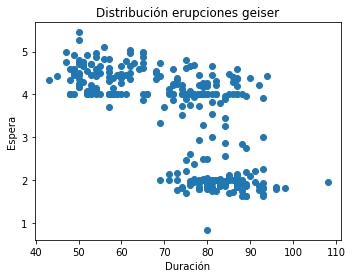

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))
ax.scatter(df.waiting, df.duration)
ax.set_title('Distribución erupciones geiser')
ax.set_ylabel('Espera')
ax.set_xlabel('Duración');

c:\Users\Daniel Montes\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Daniel Montes\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Daniel Montes\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Daniel Montes\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known

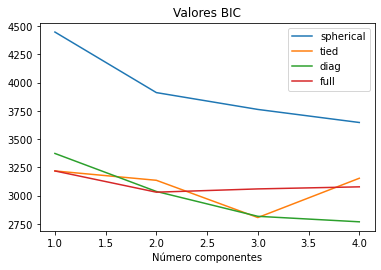

In [22]:
fig, ax = plt.subplots(figsize=(6, 3.84))

n_components = range(1, 5)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo = modelo.fit(df)
        valores_bic.append(modelo.bic(df))
        
    ax.plot(n_components, valores_bic, label=covariance_type)
        
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [23]:
modelo_gmm = GaussianMixture(
                n_components    = 3,
                covariance_type = 'diag',
                random_state    = 42, 
             )

modelo_gmm.fit(X=df)

GaussianMixture(covariance_type='diag', n_components=3, random_state=42)

In [24]:
log_probabilidad_predicha = modelo_gmm.score_samples(X=df)

c:\Users\Daniel Montes\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


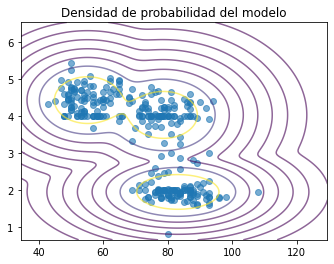

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))


x = np.linspace(min(df.waiting)*0.8, max(df.waiting)*1.2, 1000)
y = np.linspace(min(df.duration)*0.8, max(df.duration)*1.2, 1000)
xx, yy = np.meshgrid(x, y)

scores = modelo_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
scores = np.exp(scores) # Los valores están en log
ax.scatter(df.waiting, df.duration, alpha=0.6)
ax.contour(
    xx, yy, scores.reshape(xx.shape), alpha=0.6,
    levels=np.percentile(scores, np.linspace(0, 100, 10))[1:-1]
)
ax.set_title('Densidad de probabilidad del modelo');

## Detección de anomalías
vemos que podríamos considerar que hay al menos cautro anomalias

In [31]:
df_resultados = df.copy()
df_resultados['log_proba'] = log_probabilidad_predicha
df_resultados = df_resultados.sort_values(by='log_proba')
top_anomalias = df_resultados.head(10)
top_anomalias

,waiting,duration,log_proba
148,80,0.833333,-14.168780
60,108,1.950000,-10.363347
242,93,3.000000,-10.010828
26,88,2.833333,-9.262396
269,89,2.750000,-8.861988
169,84,2.866667,-8.661795
11,50,5.450000,-8.160330
109,78,2.933333,-8.001557
83,81,3.000000,-7.592703
34,76,2.600000,-7.392119


c:\Users\Daniel Montes\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


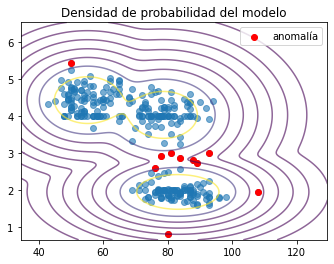

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))

# Grid de valores dentro del rango observado
x = np.linspace(min(df.waiting)*0.8, max(df.waiting)*1.2, 1000)
y = np.linspace(min(df.duration)*0.8, max(df.duration)*1.2, 1000)
xx, yy = np.meshgrid(x, y)

# Densidad de probabilidad de cada valor del grid
scores = modelo_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
scores = np.exp(scores) # Los valores están en log

ax.scatter(df.waiting, df.duration, alpha=0.6)
ax.scatter(top_anomalias.waiting, top_anomalias.duration, c="red", label='anomalía')
ax.contour(
    xx, yy, scores.reshape(xx.shape),
    alpha=0.6, cmap='viridis',
    levels=np.percentile(scores, np.linspace(0, 100, 10))[1:-1]
)
ax.set_title('Densidad de probabilidad del modelo');
ax.legend();